### Practica Módulo3 Machine Learning

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree

%matplotlib inline
sns.set()

In [4]:
# armo los dataframes
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# reviso cuanta informacion tienen almacenada
print("La cantidad de filas y columnas del dataset de entrenamiento es:", df_train.shape)
print("La cantidad de filas y columnas del dataset de prueba es:", df_test.shape)

La cantidad de filas y columnas del dataset de entrenamiento es: (891, 12)
La cantidad de filas y columnas del dataset de prueba es: (418, 11)


In [6]:
# controlo las variables y cantidad de nulos para train
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


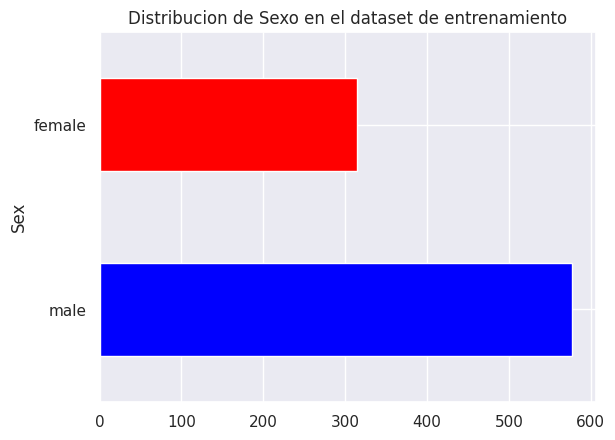

In [27]:
# Revision de distribucion de sobrevivientes
df_train.Sex.value_counts().plot(kind='barh', color = ['blue', 'red'])
plt.title('Distribucion de Sexo en el dataset de entrenamiento')
plt.show()

In [7]:
# agrego nuevas librerias de Scikit Learn
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
encoder_sex = label_encoder.fit_transform(df_train['Sex'])
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# revisamos el data set para ver si hay nulos
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# comenzamos a rellenar los nulos de Age con la mediana
df_train['Age'].fillna(df_train['Age'].median(), inplace=True)
df_train['Embarked'].fillna('S')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
# revisamos el data set para ver si hay nulos
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
# Elimino las columnas que no voy a usar
train_predictors = df_train.drop(['PassengerId','Survived', 'Name', 'Ticket', 'Cabin'], axis=1)  
train_predictors.head()

categorical_cols = [cname for cname in train_predictors.columns if
                    train_predictors[cname].nunique() < 10 and
                    train_predictors[cname].dtype == 'object']

numerical_cols = [cname for cname in train_predictors.columns if
                  train_predictors[cname].dtype in ['int64', 'float64']]

train_predictors


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,28.0,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [14]:
numerical_cols

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [15]:
# consolidacion ede las variables categoricas y numericas
final_cols = categorical_cols + numerical_cols
train_predictors = train_predictors[final_cols]
train_predictors.head()

,Sex,Embarked,Pclass,Age,SibSp,Parch,Fare
0,male,S,3,22.0,1,0,7.2500
1,female,C,1,38.0,1,0,71.2833
2,female,S,3,26.0,0,0,7.9250
3,female,S,1,35.0,1,0,53.1000
4,male,S,3,35.0,0,0,8.0500


In [16]:
# uso de dummy para variables categoricas
dummy_encoded_train_predictors = pd.get_dummies(train_predictors)
dummy_encoded_train_predictors.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,False,True,False,False,True
1,1,38.0,1,0,71.2833,True,False,True,False,False
2,3,26.0,0,0,7.9250,True,False,False,False,True
3,1,35.0,1,0,53.1000,True,False,False,False,True
4,3,35.0,0,0,8.0500,False,True,False,False,True


In [17]:
# variable y_target
y_target = df_train['Survived']
x_fuatures_one = dummy_encoded_train_predictors.values

In [18]:
# aplicamos train test split
X_train, X_test, y_train, y_test = train_test_split(x_fuatures_one, y_target, 
                                                      test_size=0.25, 
                                                      random_state=1)
tree_one = tree.DecisionTreeClassifier()
tree_one = tree_one.fit(X_train, y_train)
tree_one_accuracy = round(tree_one.score(X_test, y_test), 4)
print("La precision del arbol de decision es: ", tree_one_accuracy)

La precision del arbol de decision es:  0.7399


### Importación de la función StringIO para visualizar arbol de decisión

In [19]:
from io import StringIO
import pydotplus
from IPython.display import Image, display

In [20]:
out = StringIO()
tree.export_graphviz(tree_one, out_file=out)
graph = pydotplus.graph_from_dot_data(out.getvalue())
graph.write_png("titanic.png")

InvocationException: GraphViz's executables not found

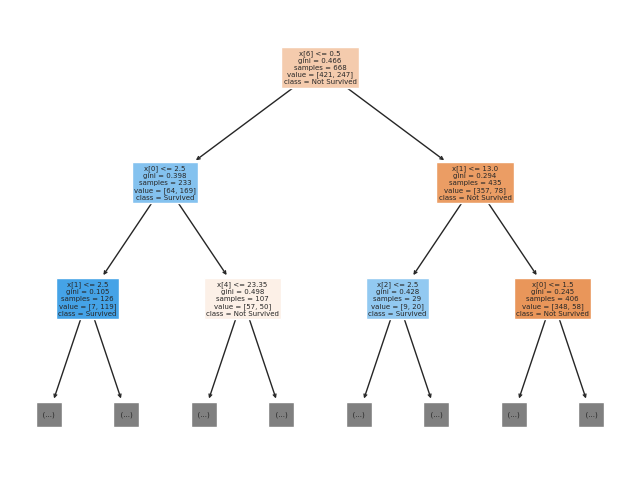

In [27]:
plt.figure(figsize=(8, 6))
tree.plot_tree(decision_tree=tree_one, filled=True,  max_depth=2,class_names=['Not Survived', 'Survived'])
plt.show()

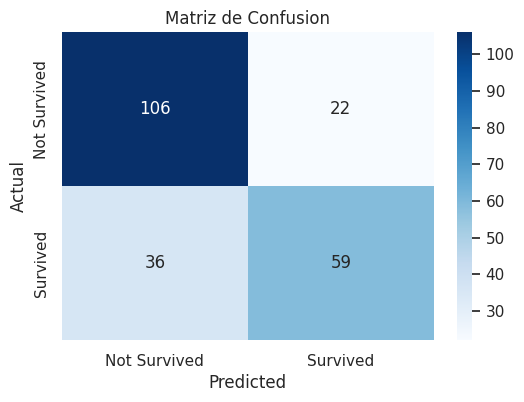

In [28]:
# realizamos una matriz de confusion
from sklearn.metrics import confusion_matrix
y_pred = tree_one.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Matriz de Confusion')
plt.show()

In [30]:
# calculamos las metricas de precision, recall y f1-score
from sklearn.metrics import classification_report
from sklearn import metrics

accuracy = metrics.accuracy_score(y_test, y_pred)
Precision = metrics.precision_score(y_test, y_pred)
Recall = metrics.recall_score(y_test, y_pred)
F1_Score = metrics.f1_score(y_test, y_pred)
Specific = metrics.recall_score(y_test, y_pred, pos_label=0)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {Precision:.4f}")
print(f"Recall: {Recall:.4f}")
print(f"F1-Score: {F1_Score:.4f}")
print(f"Specificity: {Specific:.4f}")


Accuracy: 0.7399
Precision: 0.7284
Recall: 0.6211
F1-Score: 0.6705
Specificity: 0.8281


In [ ]:
print("END")